In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'D:/Downloads/BTD/data/Training'
valid_path = 'D:/Downloads/BTD/data/Testing'

In [3]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [4]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [7]:
folders = glob('D:/Downloads/BTD/data/Training/*')

In [8]:
folders

['D:/Downloads/BTD/data/Training\\glioma_tumor',
 'D:/Downloads/BTD/data/Training\\meningioma_tumor',
 'D:/Downloads/BTD/data/Training\\no_tumor',
 'D:/Downloads/BTD/data/Training\\pituitary_tumor']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.20,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
90/90 [==============================] - 118s 1s/step - loss: 0.9491 - accuracy: 0.6575 - val_loss: 1.7086 - val_accuracy: 0.5635
Epoch 2/20
90/90 [==============================] - 56s 620ms/step - loss: 0.4690 - accuracy: 0.8185 - val_loss: 1.8106 - val_accuracy: 0.6421
Epoch 3/20
90/90 [==============================] - 55s 609ms/step - loss: 0.3455 - accuracy: 0.8693 - val_loss: 1.6224 - val_accuracy: 0.6726
Epoch 4/20
90/90 [==============================] - 54s 601ms/step - loss: 0.2857 - accuracy: 0.8941 - val_loss: 1.9403 - val_accuracy: 0.6675
Epoch 5/20
90/90 [==============================] - 54s 604ms/step - loss: 0.2511 - accuracy: 0.9080 - val_loss: 1.6138 - val_accuracy: 0.7081
Epoch 6/20
90/90 [==============================] - 54s 599ms/step - loss: 0.2092 - accuracy: 0.9237 - val_loss: 1.5497 - val_accuracy: 0.7234
Epoch 7/20
90/90 [==============================] - 54s 600ms/step - loss: 0.2249 - accuracy: 0.9143 - val_loss: 1.8989 - val_accuracy: 0.7081
E

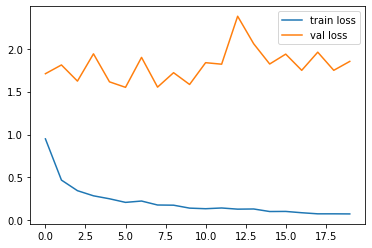

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



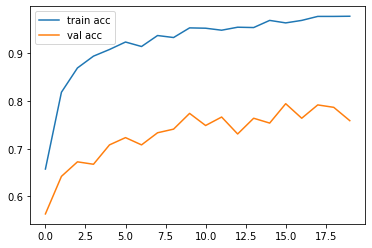

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [19]:
y_pred = model.predict(test_set)

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [36]:
import cv2
pic=cv2.imread('D:/Downloads/BTD/data/Testing/meningioma_tumor/image(10).jpg')
cv2image = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pic=cv2.resize(cv2image,(224,224))
img2=pic.copy()
pic= image.img_to_array(pic)
pic = np.expand_dims(pic, axis=0)
pred=model.predict(pic)
pred=np.argmax(pred)

In [32]:
import cv2
img=cv2.imread('D:/Downloads/BTD/data/Testing/meningioma_tumor/image(10).jpg')

In [38]:
y_pred

array([2, 3, 1, 1, 1, 1, 1, 2, 1, 0, 1, 3, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 1, 0, 1, 3, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 3, 1, 1, 2, 2,
       1, 3, 0, 2, 2, 1, 3, 1, 0, 3, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 3, 0, 2, 3, 1, 2, 1, 3, 1, 1, 3, 2, 3, 2, 2, 3, 3, 3, 1,
       1, 1, 1, 3, 2, 3, 2, 3, 1, 1, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 3, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 3, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 2, 1, 3, 0, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 0, 2,
       0, 3, 2, 2, 1, 2, 1, 2, 0, 3, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2,
       3, 1, 2, 1, 1, 3, 2, 0, 3, 2, 1, 1, 1, 2, 2, 0, 3, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 3, 1, 3, 3, 0, 2, 2, 2, 3, 1,